IN the Given project we have data set of depression patients and we have analyse them on the basis of there label and value 
we can achieve the result by using Natural language processing . With some preprocessing steps and model evaluation.
we have Reddit dataset of depression patients.

Import required libraries

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re

Read dataset and Some data processing steps including description and value counts

In [37]:
Data= pd.read_excel("Reddit.xlsx")

In [38]:
Data.head()

,text,label,Depressed_Control
0,I recently went through a breakup and she said...,depression,0.0
1,"I do not know how to navigate these feelings, ...",depression,0.0
2,"So I have been with my bf for 5 months , and h...",depression,1.0
3,I am so exhausted of this. Just when I think I...,SuicideWatch,0.0
4,I have been severly bullied since i was 5 till...,depression,1.0


In [39]:
Data.value_counts()

text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

We can analyse the sentiments by using hugging face transformer directly
with the help of pretrained model using transformer we can find the sentiment and score of the sentiment

In [40]:
def to_sentiment(Depressed_Control):
  if Depressed_Control >0.0:
    return 1
  elif Depressed_Control <0.0:
    return 0.0
  else: 
    return -1

Data['sentiment'] = Data.Depressed_Control.apply(to_sentiment)

In [41]:
classes = ["positive","negative","neutral"]

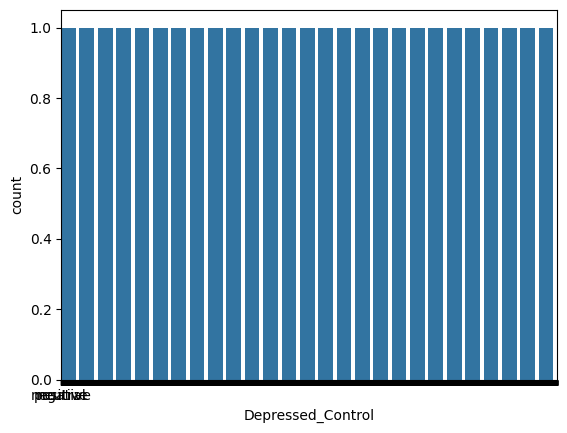

In [42]:
ax = sns.countplot(Train.Depressed_Control)
plt.xlabel('Depressed_Control')
ax.set_xticklabels(classes);

Lets use the transformer and pretrained model for text classification and the sentiment analysis

In [43]:
from transformers import pipeline

model_id = "cardiffnlp/twitter-roberta-base-sentiment-latest"

sentiment_pipe = pipeline("sentiment-analysis", model=model_id)
print(sentiment_pipe(Data.text[100]))

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'label': 'negative', 'score': 0.9244203567504883}]


In [44]:
sentiment_pipe(Train.text[3])

[{'label': 'negative', 'score': 0.9189061522483826}]

In [45]:
sentiment_pipe(Train.text[1])

[{'label': 'negative', 'score': 0.8741094470024109}]

ABOVE METHOD IS USED TO IDENTIFY THE SENTIMENT AND SCORE FOR THE TEXT GIVEN ABOVE 

WE can perform some operations on the train data Like some data cleaning and data preprocessing steps 

Data Cleaning and Data preprocessing

In [46]:
import re

In [47]:
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data
Data['text']=Data['text'].apply(lambda z: remove_punctuations(z))

In [48]:
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data
Data['text']=Data['text'].apply(lambda z: remove_html(z))

In [49]:
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data
Data['text']=Data['text'].apply(lambda z: remove_url(z))

In [50]:
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data
Data['text']=Data['text'].apply(lambda z: remove_emoji(z))

In [51]:
def clean_text(text):  
    
    # 1. Removing html tags
    review_text = BeautifulSoup(Data['text'],"tsv").get_text()
    
    # 2. Retaining only alphabets.
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    
    # 3. Converting to lower case and splitting
    word_tokens= review_text.lower().split()
    
    # 4. Remove stopwords
    le=WordNetLemmatizer()
    stop_words= set(stopwords.words("english"))     
    word_tokens= [le.lemmatize(w) for w in word_tokens if not w in stop_words]
    
    cleaned_text=" ".join(word_tokens)
    return cleaned_text

In [52]:
Data['text']

0        I recently went through a breakup and she said...
1        I do not know how to navigate these feelings n...
2        So I have been with my bf for 5 months  and he...
3        I am so exhausted of this Just when I think I ...
4        I have been severly bullied since i was 5 till...
                               ...                        
20358    I took 50mg of seroquel a few hours after I dr...
20359    that is what has happened to me last week And ...
20360    Ever just feel alone in a house full of people...
20361    Politicians Neighbors Corporations Society Cul...
20362    I feel like I am just existing but for what I ...
Name: text, Length: 20363, dtype: object

Feature Selection

In [53]:
x = Data[['text','label']]
y = Data['Depressed_Control'].fillna(0)

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
x=Train['text']
ctv = CountVectorizer(tokenizer = word_tokenize, token_pattern=None)
ctv.fit(x)
corpus_transformed = ctv.transform(x)

We can split the dataset into training and test set 

In [55]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(Train.text.values, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(min_df=2,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 2), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(xtrain) + list(xvalid))
xtrain_tfv =  tfv.transform(xtrain) 
xvalid_tfv = tfv.transform(xvalid)

In [57]:
print (xtrain.shape)
print (xvalid.shape)

(18326,)
(2037,)


We can use different models for the comparison and therir predicted score and log_loss

In [58]:
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
clf = LogisticRegression(C=1.0)
clf.fit(xtrain_tfv, ytrain)
predictions = clf.predict_proba(xvalid_tfv)
#print ("log_loss: %0.3f " %log_loss(yvalid, predictions))

In [59]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(xtrain_tfv, ytrain)
predictions = clf.predict_proba(xvalid_tfv)
print ("log_loss: %0.3f " % log_loss(yvalid, predictions))

log_loss: 0.114 


In [60]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(xtrain_tfv, ytrain)

DecisionTreeClassifier(random_state=0)

In [61]:
y_pred = clf.predict(xvalid_tfv)

In [62]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In the above project we predict the patients depressed score with the help of two different methods

We have to measure evaluation matrix and statistical significant 

In [63]:
from sklearn.metrics import classification_report
target_names = ['clean_text','is_depression']
print(classification_report(yvalid, y_pred, target_names=target_names))

               precision    recall  f1-score   support

   clean_text       0.99      0.99      0.99      2022
is_depression       0.04      0.07      0.05        15

     accuracy                           0.98      2037
    macro avg       0.52      0.53      0.52      2037
 weighted avg       0.99      0.98      0.98      2037



In [64]:
import statsmodels.api as sm

#fit logistic regression model
model = sm.OLS(y_pred, yvalid).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              5.671
Date:                Fri, 17 Nov 2023   Prob (F-statistic):                      0.0173
Time:                        02:46:33   Log-Likelihood:                          1635.8
No. Observations:                2037   AIC:                                     -3270.
Df Residuals:                    2036   BIC:                                     -3264.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [65]:
print(model.pvalues)

Depressed_Control    0.017336
dtype: float64


p-value is less than 0.05 to be considered as statistically significant. It means data really represents the observed effect.